# Linear Regression

You have gathered information on how much companies spend on TV, radio and newspaper ads in a year as well as the sales figure of the company for that given year.

On the basis of this data, we can explore the question of *how should we spend our advertising money in the future?*

This general question might lead us to more specific questions:
* Is there a relationship between ads and sales?
* Which ad types contribute to sales?
* What is the effect of each ad type of sales?
* Given ad spending in a particular market, can sales be predicted?

The data contains the following columns:

* TV: Yearly dollar amount spent on TV ads (thousands)
* radio: Yearly dollar amount spent on radio ads (thousands)
* newspaper: Yearly dollar amount spent on newspaper ads (thousands)
* sales: Yearly dollar sales figures (millions)

For this notebook, we will only take a look at the TV ads and sales.

### Import Libraries
First we will get our environment ready with the libraries we'll need and then import the advertising data!


In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
Ads = pd.read_csv('Advertising.csv')

In [3]:
# Take a look at first few rows of the dataset
Ads.head()

,TV,radio,newspaper,sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


In [4]:
# Take a look at the dataframe containing housing data
Ads.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   radio      200 non-null    float64
 2   newspaper  200 non-null    float64
 3   sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


In [5]:
# Take a look at descriptive statistics of the dataset
Ads.describe()

,TV,radio,newspaper,sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,14.022500
std,85.854236,14.846809,21.778621,5.217457
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,10.375000
50%,149.750000,22.900000,25.750000,12.900000
75%,218.825000,36.525000,45.100000,17.400000
max,296.400000,49.600000,114.000000,27.000000


In [6]:
# Take a look at the column names
Ads.columns

Index(['TV', 'radio', 'newspaper', 'sales'], dtype='object')

# EDA - explaratory data analysis

Let's create some simple plots to check out the data!

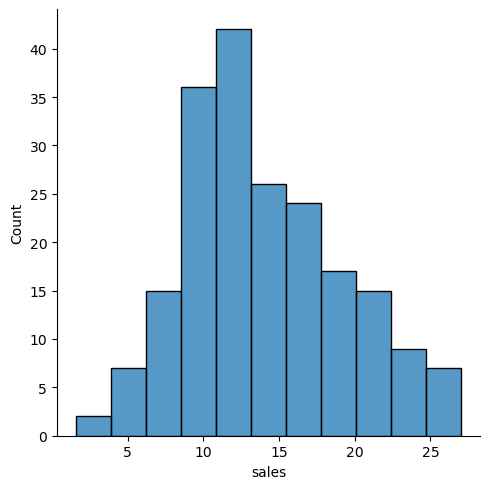

In [7]:
# Distribution of Sales column
sns.displot(Ads['sales'])

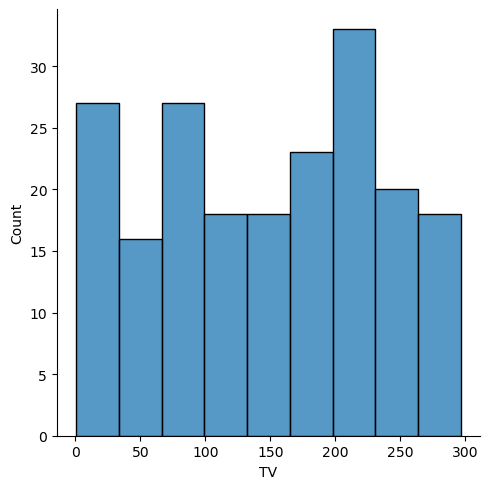

In [8]:
# Distribution of TV column
sns.displot(Ads['TV'])

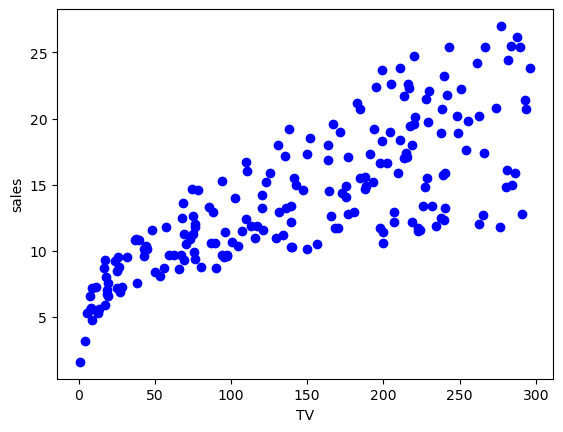

In [9]:
plt.scatter(Ads['TV'], Ads['sales'],  color='blue')
plt.xlabel("TV")
plt.ylabel("sales")
plt.show()

## Training a Linear Regression Model

Let's now begin to train out regression model! We will need to first split up our data into an X array that contains TV column, and a y array with the target variable, in this case the sales column. 
### X and y arrays

In [10]:
X = Ads[['TV']]
y = Ads['sales']

## Train Test Split

Now let's split the data into a training set and a testing set. We will train out model on the training set and then use the test set to evaluate the model.

Train/Test Split involves splitting the dataset into training and testing sets respectively, which are mutually exclusive. After which, you train with the training set and test with the testing set. 
This will provide a more accurate evaluation on out-of-sample accuracy because the testing dataset is not part of the dataset that have been used to train the data. It is more realistic for real world problems.

Lets split our dataset into train and test sets, 80% of the entire data for training, and the 20% for testing. 

In [11]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=101)

train_test_split randomly picks samples from our data to form the training and test set.

- <b> test_size </b> shows how much of our data we will dedicate as test set. In our case, 40% will be dedicated to testing and 60% will be dedicated to training.

- <b> random_state </b> performs a random split using np.random. If you want your results to be stochastic each time, simply leave it as the default value “None”. (If you want the same results as me, you need to use the same random_state)

- <b> shuffle </b> (default = True) shuffles the samples in the dataset to ensure randomness of the train_test selection.

## Creating and Training the Model

#### Training data distribution (TV vs. sales)

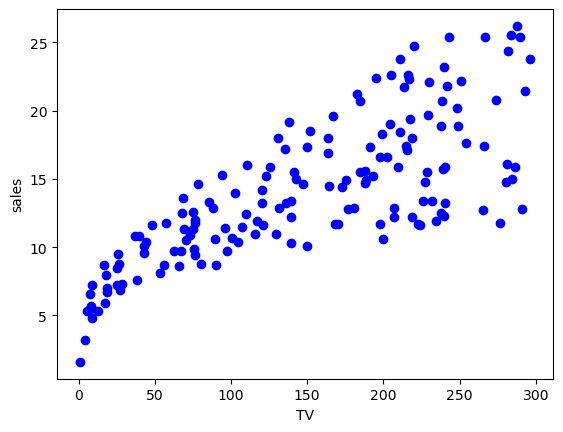

In [12]:
plt.scatter(X_train, y_train,  color='blue')
plt.xlabel("TV")
plt.ylabel("sales")
plt.show()

#### Testing data distribution (TV vs. Sales)

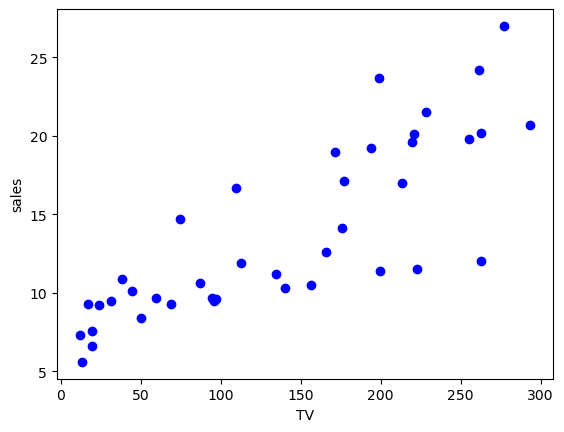

In [13]:
plt.scatter(X_test, y_test,  color='blue')
plt.xlabel("TV")
plt.ylabel("sales")
plt.show()

#### Modeling
Using sklearn package to model data.

In [14]:
from sklearn.linear_model import LinearRegression

In [15]:
lm = LinearRegression()

In [16]:
lm.fit(X_train, y_train) #Train the model
# Notice we don't set it equal to an object. Since we already created the model in the cell above, 
# fit function trains our model

LinearRegression()

## Model Evaluation

Let's evaluate the model by checking out it's coefficients and how we can interpret them.

As mentioned before, __Coefficient__ and __Intercept__ in the simple linear regression, are the parameters of the fit line. 
Given that it is a simple linear regression, with only 2 parameters, and knowing that the parameters are the intercept and slope of the line, sklearn can estimate them directly from our data. 

In [17]:
# print the intercept
print('Intercept: ',lm.intercept_)

Intercept:  7.122421244159419


In [18]:
coeff_df = pd.DataFrame(lm.coef_,X.columns,columns=['Coefficient'])
coeff_df
# Alternatively you can also just print the coefficients as below
#print ('Coefficients: ', lm.coef_)

,Coefficient
TV,0.046678


Interpreting the coefficient:

A 1 unit increase in **TV** is associated with an **increase of 0.04 million in sales**. 
Or more clearly: An additional 1,000 dollars spent on TV ads is associated with an increase in sales of ~\$46000

#### Plot outputs

We can plot the fit line over the data:

Text(0, 0.5, 'sales')

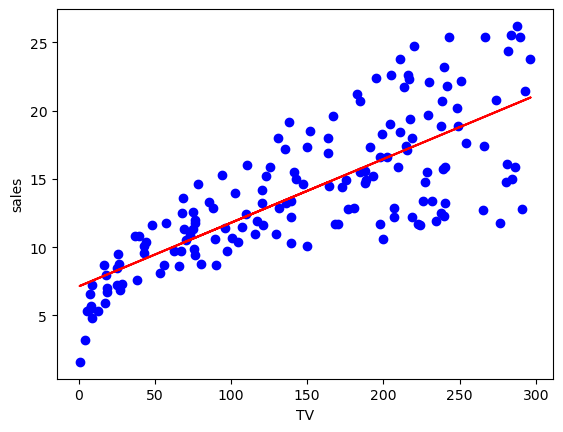

In [19]:
plt.scatter(X_train, y_train,  color='blue')
plt.plot(X_train,lm.coef_*X_train + lm.intercept_, color="red")
#plt.plot(X_train,lm.predict(X_train),"-r")
plt.xlabel("TV")
plt.ylabel("sales")

## Predictions from our Model

Now that we have trained our model, it’s time to make some predictions. To do so, we will use our test data and see how accurately our algorithm predicts the sales figures.

In [20]:
predictions = lm.predict(X_test)

Let's plot our straight line with the test data :

Text(0, 0.5, 'sales')

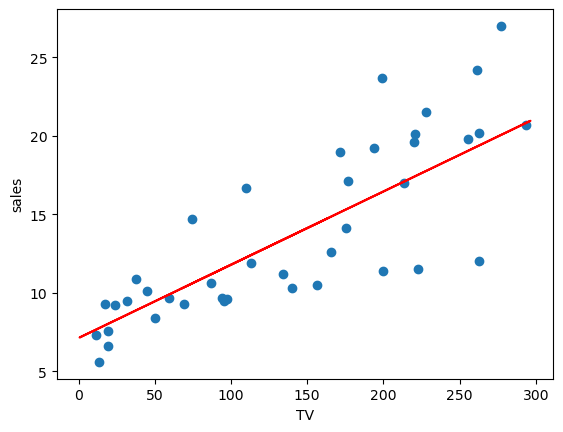

In [21]:
plt.scatter(X_test,y_test)
plt.plot(X_train,lm.coef_*X_train + lm.intercept_, color="red")
plt.xlabel("TV")
plt.ylabel("sales")

**Residual Histogram**

Normality of the residuals is an assumption of running a linear model. So, if your residuals are normal, it means that your assumption is valid and model predictions should also be valid.

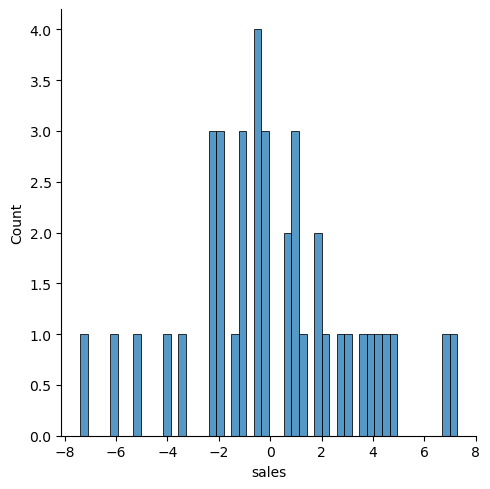

In [22]:
sns.displot((y_test-predictions),bins=50)

#### Evaluation

The final step is to evaluate the performance of the algorithm. We compare the actual values and predicted values to calculate the accuracy of a regression model. Evaluation metrics provide a key role in the development of a model, as it provides insight to areas that require improvement.

Here are three common evaluation metrics for regression problems:

**Mean Absolute Error** (MAE) is the mean of the absolute value of the errors. This is the easiest of the metrics to understand since it’s just average error:

$$\frac 1n\sum_{i=1}^n|y_i-\hat{y}_i|$$

**Mean Squared Error** (MSE) is the mean of the squared errors. It’s more popular than Mean absolute error because the focus is geared more towards large errors. This is due to the squared term exponentially increasing larger errors in comparison to smaller ones:

$$\frac 1n\sum_{i=1}^n(y_i-\hat{y}_i)^2$$

**Root Mean Squared Error** (RMSE) is the square root of the mean of the squared errors:

$$\sqrt{\frac 1n\sum_{i=1}^n(y_i-\hat{y}_i)^2}$$

Comparing these metrics:

- **MAE** is the easiest to understand, because it's the average error.
- **MSE** is more popular than MAE, because MSE "punishes" larger errors, which tends to be useful in the real world.
- **RMSE** is even more popular than MSE, because RMSE is interpretable in the "y" units.

All of these are **loss functions**, because we want to minimize them.

In [23]:
from sklearn import metrics

In [24]:
print('Mean Absolute Error (MAE):', metrics.mean_absolute_error(y_test, predictions))  
print('Mean Squared Error (MSE):', metrics.mean_squared_error(y_test, predictions))  
print('Root Mean Squared Error (RMSE):', np.sqrt(metrics.mean_squared_error(y_test, predictions)))

Mean Absolute Error (MAE): 2.4503287262775473
Mean Squared Error (MSE): 10.025842933134657
Root Mean Squared Error (RMSE): 3.1663611501429614


R-squared (R2) is not error, but is a popular metric for accuracy of your model. It represents how close the data are to the fitted regression line. The higher the R2, the better the model fits your data. Best possible score is 1.0 and it can be negative (because the model can be arbitrarily worse - R2  compares the fit of the chosen model with that of a horizontal straight line (the null hypothesis). If the chosen model fits worse than a horizontal line, then R2 is negative).

In [25]:
print("R2-score:", metrics.r2_score( y_test, predictions))

R2-score: 0.6614062681218336


# Multiple Linear Regression

We are going to re-create our linear regression variable with multiple predictors (TV, radio, newspaper)

## Training a Multiple Linear Regression Model

We will need to first split up our data into an X array that contains all of our predictors, and a y array with the target variable, in this case the sales column. 
### X and y arrays

In [26]:
X2 = Ads[['TV', 'radio','newspaper']]
y2 = Ads['sales']

## Train Test Split

Similar to above, let's split the data into a training set and a testing set. We will train out model on the training set and then use the test set to evaluate the model.

Lets split our dataset into train and test sets, 80% of the entire data for training, and the 20% for testing. 

In [27]:
from sklearn.model_selection import train_test_split
X_train2, X_test2, y_train2, y_test2 = train_test_split(X2, y2, test_size=0.20, random_state=101)

## Create and Train the model

In [28]:
lm2 = LinearRegression()

In [29]:
lm2.fit(X_train2, y_train2)

LinearRegression()

## Model Evaluation


In [30]:
print('Intercept: ',lm2.intercept_)

Intercept:  2.9013136928731775


In [31]:
coeff_df2 = pd.DataFrame(lm2.coef_,X2.columns,columns=['Coefficient'])
coeff_df2

,Coefficient
TV,0.045328
radio,0.189941
newspaper,0.000274


In [32]:
predictions2 = lm2.predict(X_test2)

In [33]:
print('Mean Absolute Error (MAE):', metrics.mean_absolute_error(y_test2, predictions2))  
print('Mean Squared Error (MSE):', metrics.mean_squared_error(y_test2, predictions2))  
print('Root Mean Squared Error (RMSE):', np.sqrt(metrics.mean_squared_error(y_test2, predictions2)))

Mean Absolute Error (MAE): 1.1244750006255644
Mean Squared Error (MSE): 2.063418850121475
Root Mean Squared Error (RMSE): 1.4364605285636898


In [34]:
print("R2-score:", metrics.r2_score(y_test2, predictions2))

R2-score: 0.9303140201228004


In [35]:
## This is a much better model compared to the previous as the RMSE error has decreased.